In [172]:
import numpy as np
import pandas as pd
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import yfinance as yf

In [173]:
usd_euro = yf.download("EURUSD=X", start='2012-1-1', end="2022-1-1")
usd_rial = yf.download("SARUSD=X", start='2012-1-1', end="2022-1-1")
usd_yuan = yf.download("CNYUSD=X", start='2012-1-1', end="2022-1-1")
btc = yf.download("BTC-USD", start='2012-1-1', end="2022-1-1")
# usa_utilization_rate = yf.download("", start='2012-1-1', end="2022-1-1")
# this data did not exist in yahoo finance and other sources needed confirmation to access them
gold = yf.download("GC=F", start='2012-1-1', end="2022-1-1")
silver = yf.download("SI=F", start='2012-1-1', end="2022-1-1")
wheat = yf.download("ZW=F", start='2012-1-1', end="2022-1-1")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [174]:

def PCA(data):
    data = data.asfreq('b')
    data = data.interpolate()
    # Standardize/normalize the data
    data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    # Compute the covariance matrix
    covariance_matrix = np.cov(data.T)
    covariance_matrix = np.nan_to_num(covariance_matrix)
    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = eigh(covariance_matrix)
    # Sort the eigenvalues in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]


    selected_eigenvectors = eigenvectors[:, :2]


    return eigenvalues, selected_eigenvectors



In [175]:
def scree_plot(eigenvalues, name):
    # Compute the cumulative sum of the eigenvalues
    # cumulative_sum = np.cumsum(eigenvalues)

    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    p = np.round(explained_variance_ratio*100, decimals=1)



    plt.bar(x=range(1, len(p)+1) ,height=p)
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance')
    plt.title(f'Scree Plot of {name}')
    plt.show()


In [176]:
def pca_plot(data, eigenvectors, name):
    # Transform the data to its first two principal components
    transformed_data = np.dot(data, eigenvectors[:, :2])
    
    # Plot the transformed data
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=transformed_data[:, 1])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'PCA Plot of {name}')
    plt.show()

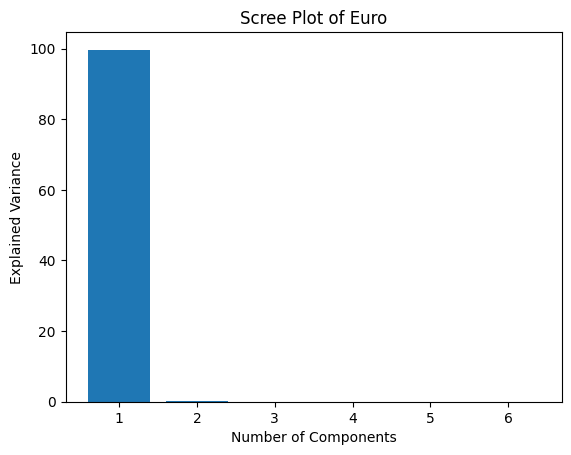

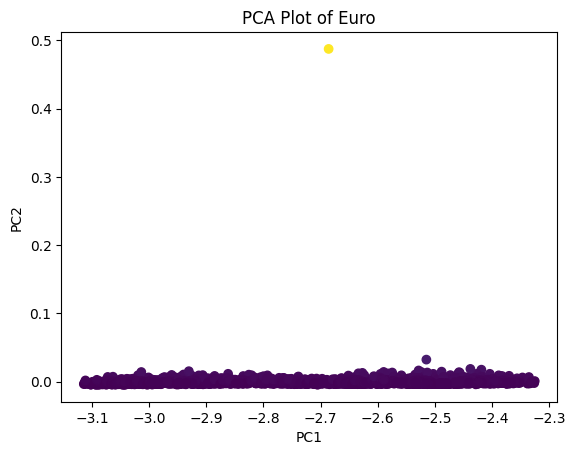

In [177]:
values, vectors = PCA(usd_euro)
scree_plot(values, "Euro")
pca_plot(usd_euro, vectors, "Euro")

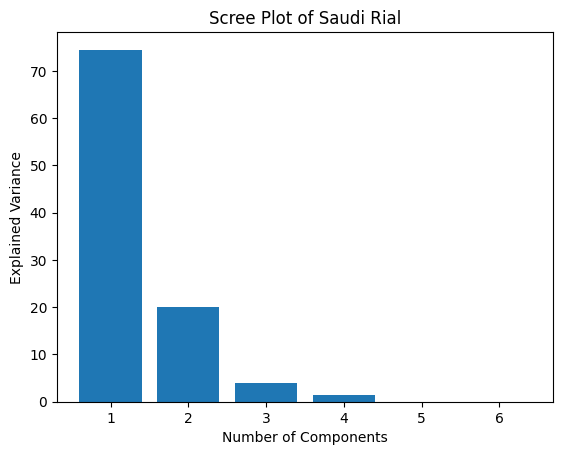

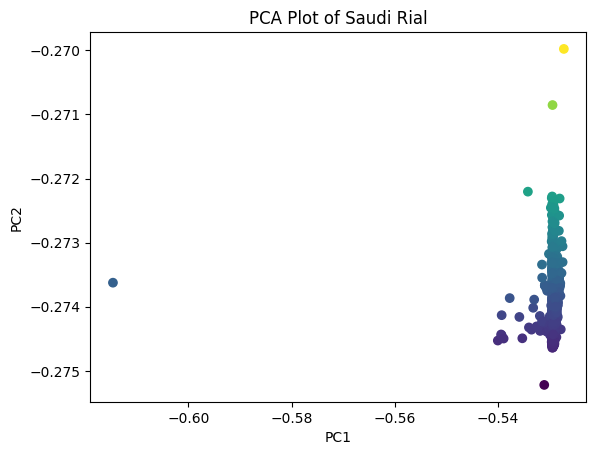

In [178]:
values, vectors = PCA(usd_rial)
scree_plot(values, "Saudi Rial")
pca_plot(usd_rial, vectors, "Saudi Rial")

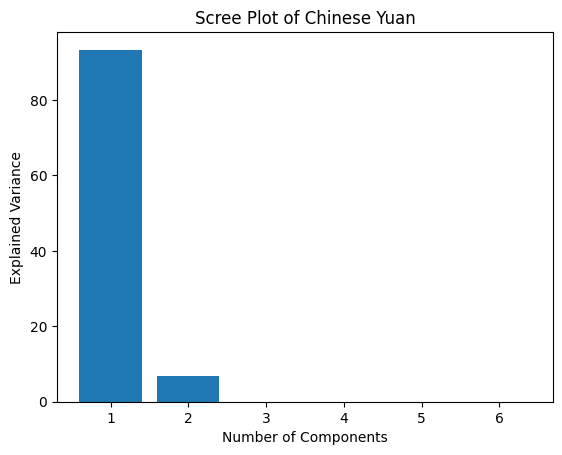

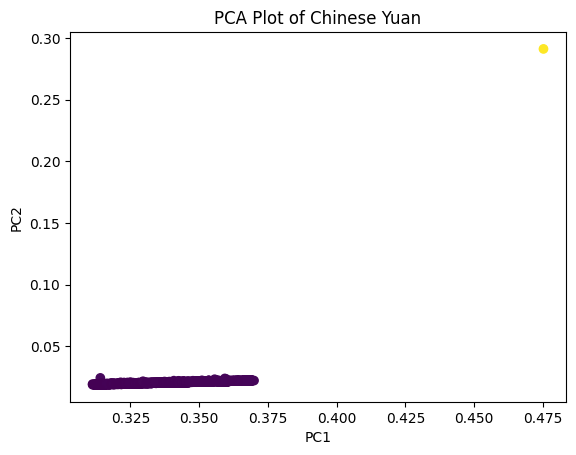

In [179]:
values, vectors = PCA(usd_yuan)
scree_plot(values, "Chinese Yuan")
pca_plot(usd_yuan, vectors, "Chinese Yuan")

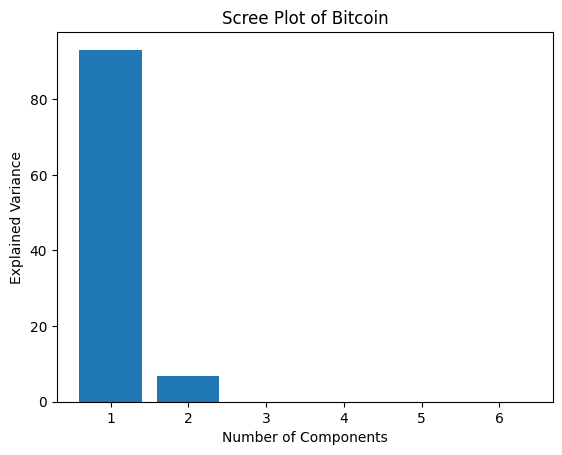

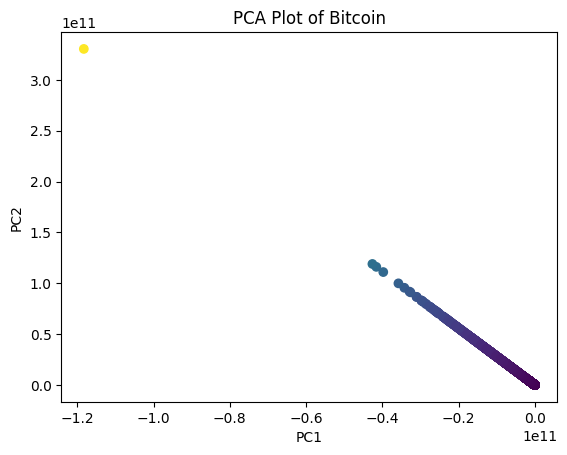

In [180]:
values, vectors = PCA(btc)
scree_plot(values, "Bitcoin")
pca_plot(btc, vectors, "Bitcoin")

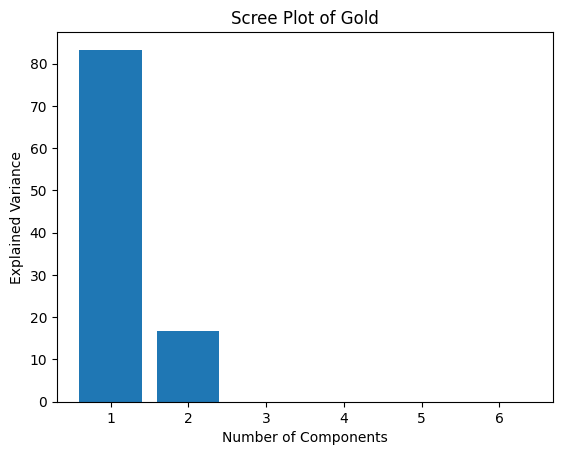

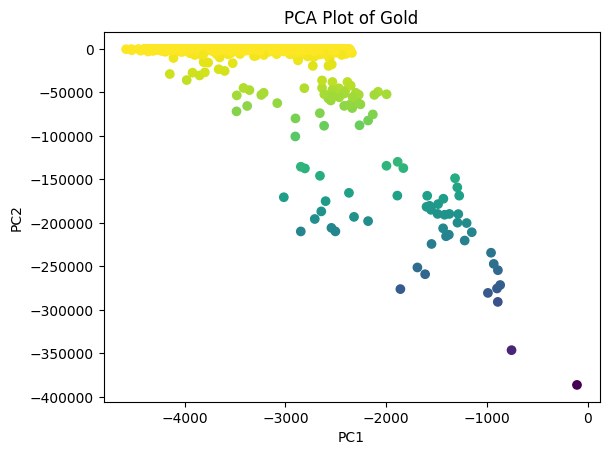

In [181]:
values, vectors = PCA(gold)
scree_plot(values, "Gold")
pca_plot(gold, vectors, "Gold")

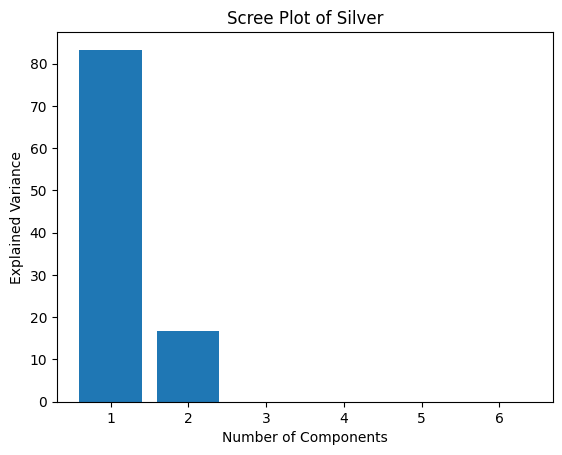

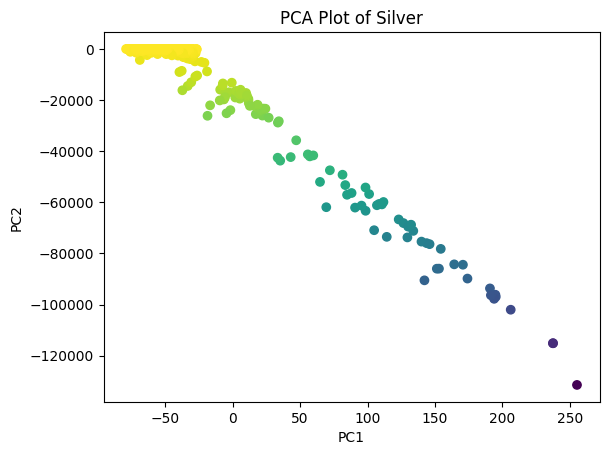

In [182]:
values, vectors = PCA(silver)
scree_plot(values, "Silver")
pca_plot(silver, vectors, "Silver")

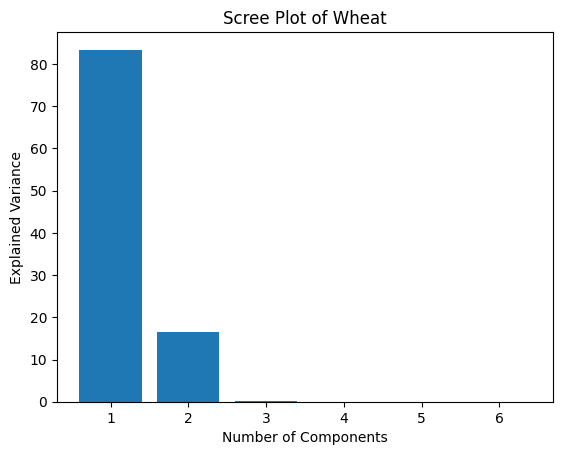

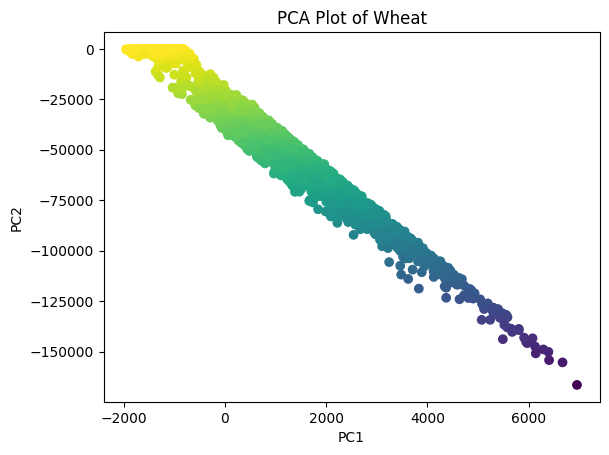

In [183]:
values, vectors = PCA(wheat)
scree_plot(values, "Wheat")
pca_plot(wheat, vectors, "Wheat")